In [1]:
from MeasurementErrorMitigation import MeasurementErrorMitigation
import math

## Test Circuit (Inverse Quantum Fourier Transformation)

In [2]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

In [3]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(math.pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

In [4]:
def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

In [5]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

## Sample Code

In [6]:
from qiskit import QuantumCircuit

nqubits = 3
number = 5
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*math.pi/4,0)
qc.p(number*math.pi/2,1)
qc.p(number*math.pi,2)
qc = inverse_qft(qc, nqubits)

qc.draw(fold=-1)

┌─────────┐┌─────────────┐   ┌───┐                                        
q_0: ┤ U2(0,π) ├┤ U(0,0,5π/4) ├─X─┤ H ├─■────────────────────────■─────────────
     ├─────────┤├─────────────┤ │ └───┘ │P(-π/2) ┌───┐           │             
q_1: ┤ U2(0,π) ├┤ U(0,0,5π/2) ├─┼───────■────────┤ H ├─■─────────┼─────────────
     ├─────────┤└┬───────────┬┘ │                └───┘ │P(-π/2)  │P(-π/4) ┌───┐
q_2: ┤ U2(0,π) ├─┤ U(0,0,5π) ├──X──────────────────────■─────────■────────┤ H ├
     └─────────┘ └───────────┘                                            └───┘

Unitary Index : 1
Name of Backend : qasm_simulator
Number of Total Shots : 1000
Simulation Result (counts) : {'101': 1000}

Unitary Index : 5
Name of Backend : qasm_simulator
Number of Total Shots : 1000
Simulation Result (counts) : {'101': 1000}

Unitary Index : 9
Name of Backend : qasm_simulator
Number of Total Shots : 1000
Simulation Result (counts) : {'101': 1000}



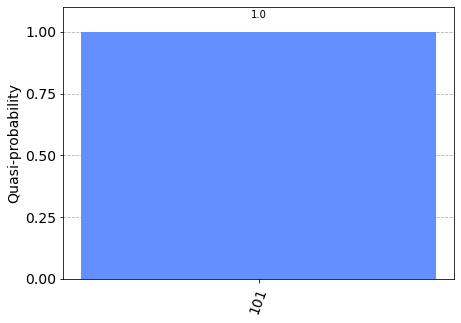

In [7]:
MeasurementErrorMitigation(qc).SimulationQC()